# **Marketing Campaign for Banking Products**
**Author: Shashank Agrawal**

A bank has a growing customer base. The bank wants to increase borrowers (asset
customers) base to bring in more loan business and earn more through the interest on
loans. So , the bank wants to convert the liability based customers to personal loan
customers. (while retaining them as depositors). A campaign that the bank ran last year
for liability customers showed a healthy conversion rate of over 9% success. The
department wants you to build a model that will help them identify the potential
customers who have a higher probability of purchasing the loan. This will increase the
success ratio while at the same time reduce the cost of the campaign.

**Content**

Column descriptions:
* ID: Customer ID
* Age: Customer's age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (USD 1000)
* ZIPCode: Home Address ZIP code.
* Family: Family size of the customer
* CCAvg Avg.: spending on credit cards per month (USD 1000)
* Education Education: Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (USD 1000)
* Personal Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities Account: Does the customer have a securities account with the bank?
* CD Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Does the customer use internet banking facilities?
* CreditCard: Does the customer uses a credit card issued by UniversalBank?

Output column is **Personal Loan**.

**The GOAL IS!**
* To sell more Personal Loan products to Bank customers.
* To devise campaigns to better target marketing to increase the success ratio with a minimal budget.
* To identify the potential customers who have a higher probability of purchasing the loan.

In [1]:
from google.colab import files
uploaded = files.upload()

# Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Import & Assess Dataset

dataset - https://www.kaggle.com/itsmesunil/bank-loan-modelling/download

In [3]:
data = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx','Data')

The file given below contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, **only 480 (= 9.6%) accepted the personal loan** that was offered to them in the earlier campaign

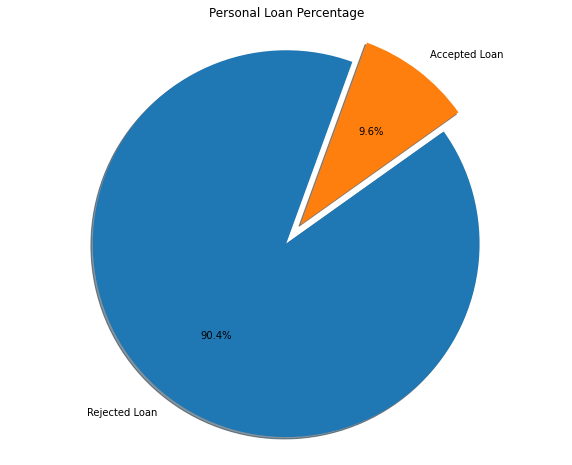

In [4]:
source_counts =pd.DataFrame(data["Personal Loan"].value_counts()).reset_index()
source_counts.columns =["Labels","Personal Loan"]
source_counts["Labels"] = source_counts["Labels"].replace([0,1],["Rejected Loan","Accepted Loan"])

fig1,ax1=plt.subplots(figsize=(10,8))
plt.title("Personal Loan Percentage")
explode = (0, 0.25)
ax1.pie(source_counts["Personal Loan"], explode=explode, radius = 2, labels=source_counts["Labels"], autopct='%1.1f%%',
        shadow=True, startangle=70)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()



In [5]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [7]:
data.shape

(5000, 14)

In [8]:
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


**Observation:**

* No null values
* No missing values
* Columns "ID", "ZIP Code" are categorical nominal variables.
* Column "Experience" has some negative value. Need to fix.
* Binary variables: "Personal Loan", "CreditCard", "Online", "CD Account", "Securities Account" has clean data.
* Ordinary Cat variables: "Family" and "Education" are clean too.

# Exploratory Data Analysis

**Detailed Info:**

In [9]:
listItem = []
for col in data.columns :
    listItem.append([col,data[col].dtype,
                     data[col].isna().sum(),
                     round((data[col].isna().sum()/len(data[col])) * 100,2),
                    data[col].nunique(),
                     list(data[col].sample(5).drop_duplicates().values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,ID,int64,0,0.0,5000,"[2549, 573, 1578, 4835, 53]"
1,Age,int64,0,0.0,45,"[43, 62, 38, 33, 34]"
2,Experience,int64,0,0.0,47,"[37, 32, 12, 20, 13]"
3,Income,int64,0,0.0,162,"[73, 44, 59, 78, 180]"
4,ZIP Code,int64,0,0.0,467,"[94025, 95211, 94611, 94143, 90095]"
5,Family,int64,0,0.0,4,"[4, 1, 2, 3]"
6,CCAvg,float64,0,0.0,108,"[5.0, 4.3, 2.5, 1.3, 1.8]"
7,Education,int64,0,0.0,3,"[2, 1]"
8,Mortgage,int64,0,0.0,347,"[190, 0, 334]"
9,Personal Loan,int64,0,0.0,2,[0]


**Data Cleaning:**

There is one special case about **ZIP Code** feature. Although it seems to be numeric, it is in fact categorical. Different ZIP codes indicates different addresses. If we look at the number of unique values it takes, we see a very high number(467).

We can deem ZIP Code uninformative in this case and drop it.

In [10]:
data = data.drop(['ID','ZIP Code'], axis=1)

In [11]:
data.head(5)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [12]:
(data.Mortgage==0).sum()

3462

In [13]:
(data.CCAvg==0).sum()

106

In [14]:
data.Family.value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [15]:
data.Education.value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [16]:
data.CreditCard.value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

In [17]:
data.Online.value_counts()

1    2984
0    2016
Name: Online, dtype: int64

In [18]:
data['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [19]:
data['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

### **Univariate Analysis:**

In [20]:
categorical_variables=[col for col in data.columns if data[col].nunique()<=5]
print(categorical_variables)
continuous_variables=[col for col in data.columns if data[col].nunique()>5]
print(continuous_variables)
categorical_variables.remove("Personal Loan") 
continuous_variables.remove("Experience")

['Family', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']


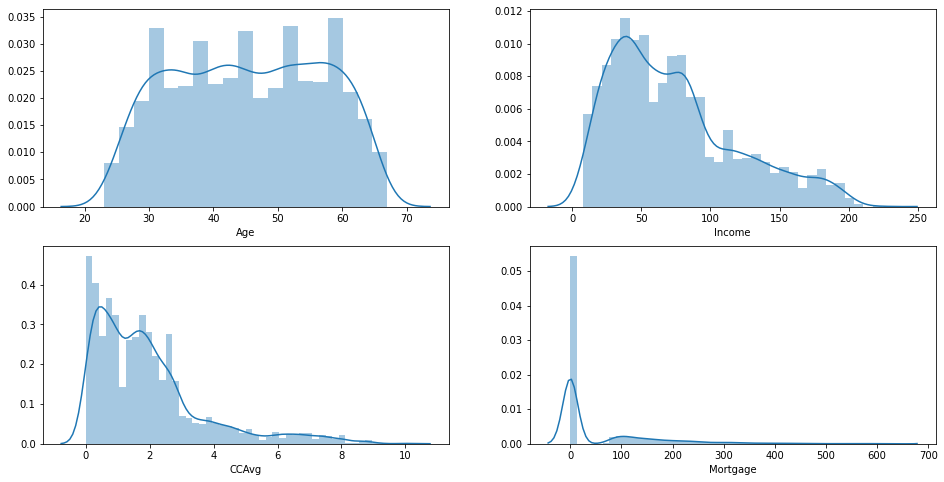

In [21]:
fig=plt.figure(figsize=(16,8))
for i,col in enumerate(continuous_variables):
    ax=fig.add_subplot(2,2,i+1)
    sns.distplot(data[col])

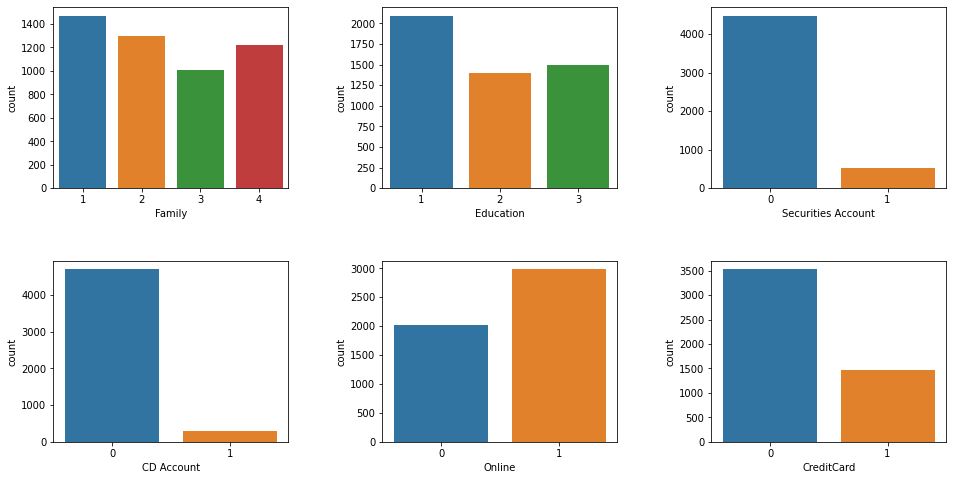

In [22]:
fig=plt.figure(figsize=(16,8))
fig.subplots_adjust(wspace=0.4,hspace=0.4)
for i,col in enumerate(categorical_variables):
    ax=fig.add_subplot(2,3,i+1)
    sns.countplot(data[col])

**Obseravtion:**

* We can see that Income, CCAvg and mortgage are skewed.
* Majority of customers who does not have loan have securities account

### **Multivariate Analysis:**

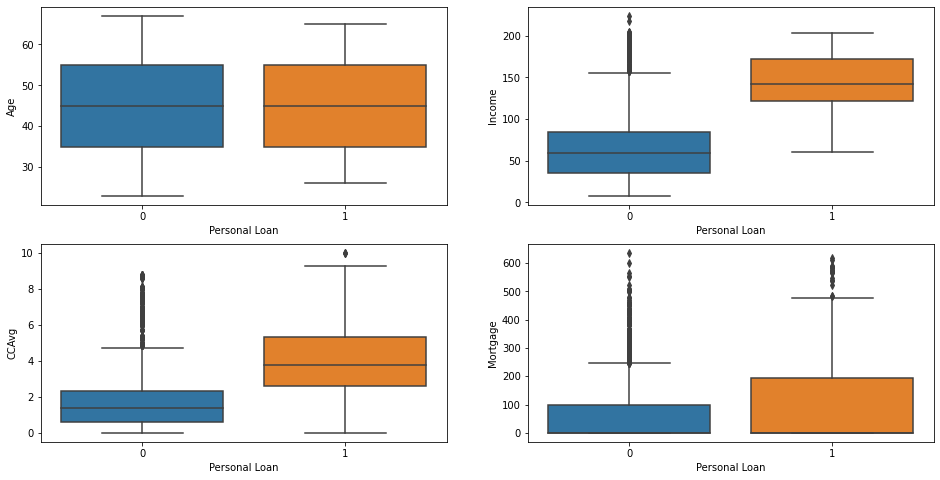

In [23]:
fig=plt.figure(figsize=(16,8))
for i,col in enumerate(continuous_variables):
    ax=fig.add_subplot(2,2,i+1)
    sns.boxplot(y=data[col],x=data['Personal Loan'])


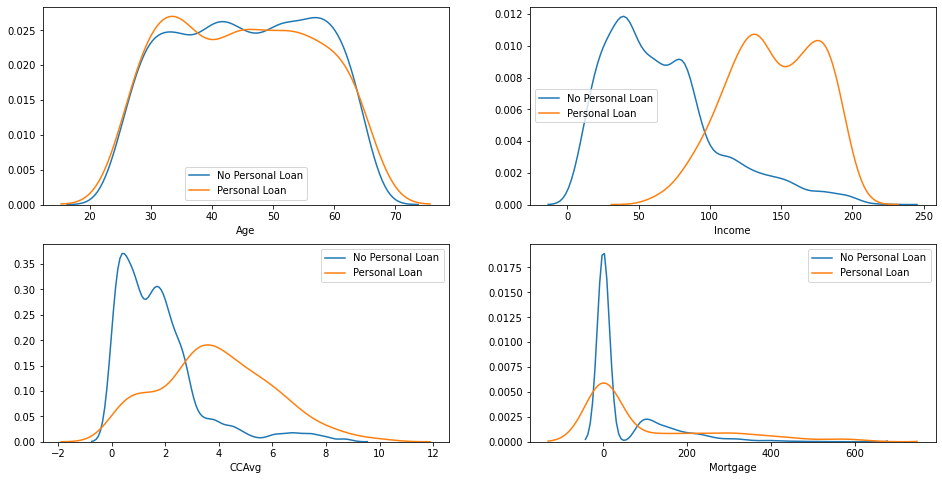

In [24]:
fig=plt.figure(figsize=(16,8))
for i,col in enumerate(continuous_variables):
    ax=fig.add_subplot(2,2,i+1)
    ax1=sns.distplot(data[col][data['Personal Loan']==0],hist=False,label='No Personal Loan')
    sns.distplot(data[col][data['Personal Loan']==1],hist=False,ax=ax1,label='Personal Loan')

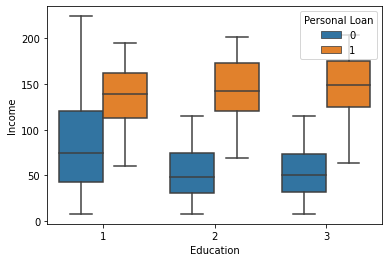

In [25]:
sns.boxplot(x= 'Education', y = 'Income', hue = 'Personal Loan', data = data)

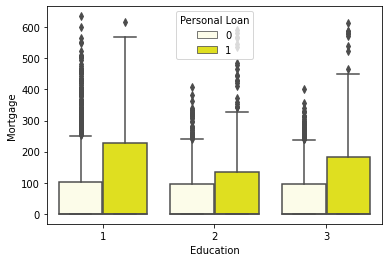

In [26]:
sns.boxplot(x="Education", y='Mortgage', hue="Personal Loan", data=data,color='yellow')

Text(0.5, 1.0, 'Family and Income Boxplot')

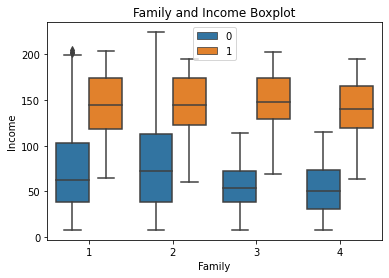

In [27]:
sns.boxplot(x='Family',y='Income',hue='Personal Loan', data=data)
plt.legend(loc='upper center')
plt.title("Family and Income Boxplot")

**Inference :** 
* Personal Loan doesn't show variations with Age.
* Income has a good effect on Personal Loan Customers with High Income have more chances of having Personal Loan.
* CCAvg also show a good relationship with Personal Loan customers with personal loan have high Avg. spending on credit cards per month
* Customers with low Mortgage have opted for Personal Loan

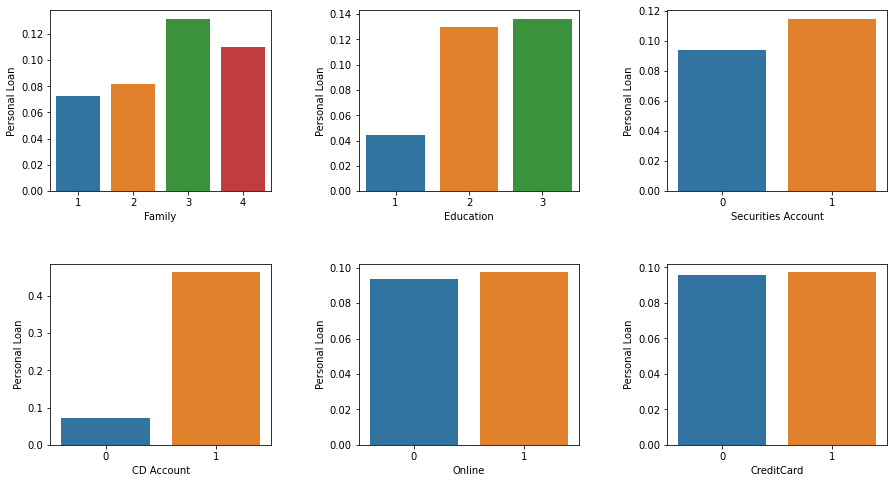

In [28]:
fig=plt.figure(figsize=(15,8))
fig.subplots_adjust(wspace=0.4,hspace=0.4)
for i,col in enumerate(categorical_variables):
    ax=fig.add_subplot(2,3,i+1)
    sns.barplot(x=col,y='Personal Loan',data=data,ci=None)

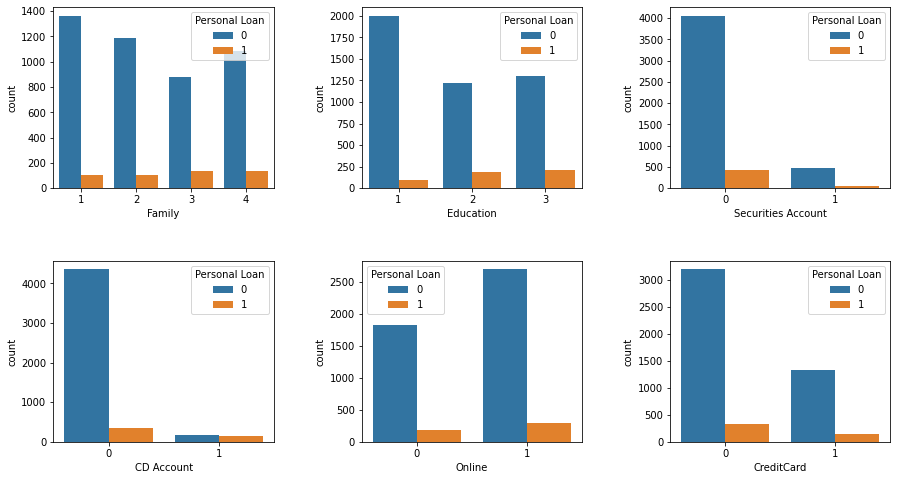

In [29]:
fig=plt.figure(figsize=(15,8))
fig.subplots_adjust(wspace=0.4,hspace=0.4)
for i,col in enumerate(categorical_variables):
    ax=fig.add_subplot(2,3,i+1)
    sns.countplot(x=col,hue='Personal Loan',data=data)

**Observation:** 
* The graph show persons who have personal loan have a higher credit card average.
* Customers with family size equal to 3 have more chances of having Personal Loan.
* Customers with Undergrad degree have less chances of having Personal Loan as compaired to other customers having Graduate or Advanced/Professional degree
* Customers with CD Account and Securities Account have more chances of having Personal Loan.
* Customers using online Facitilies or not, having credit card or not doesn't effect much in chances of having Personal Loan 

**Heatmap correlation**

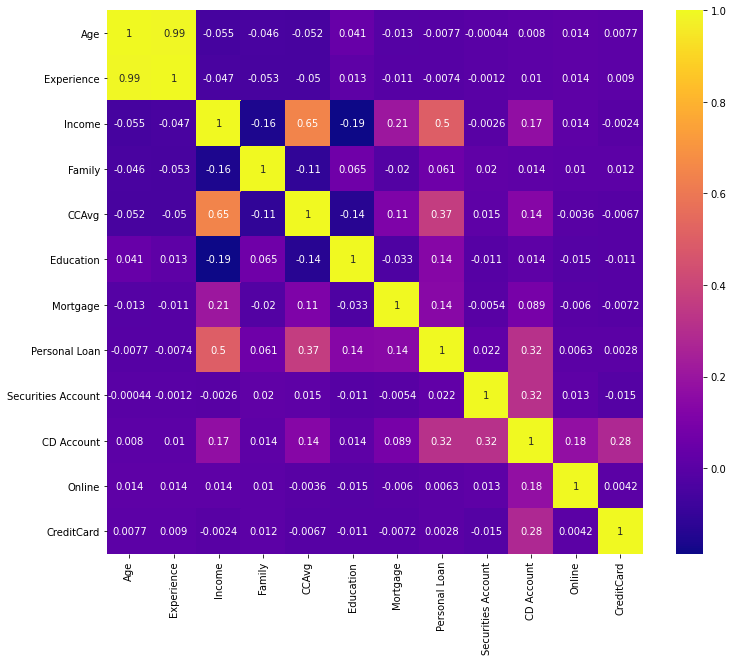

In [30]:
fig, ax = plt.subplots(figsize = (12,10))
sns.heatmap(data.corr(),cmap = 'plasma', annot=True)

**Observation:**

Their is huge correlation between age and experience, also experience contains negative values. Its better to drop it.

In [31]:
data = data.drop("Experience", axis =1)

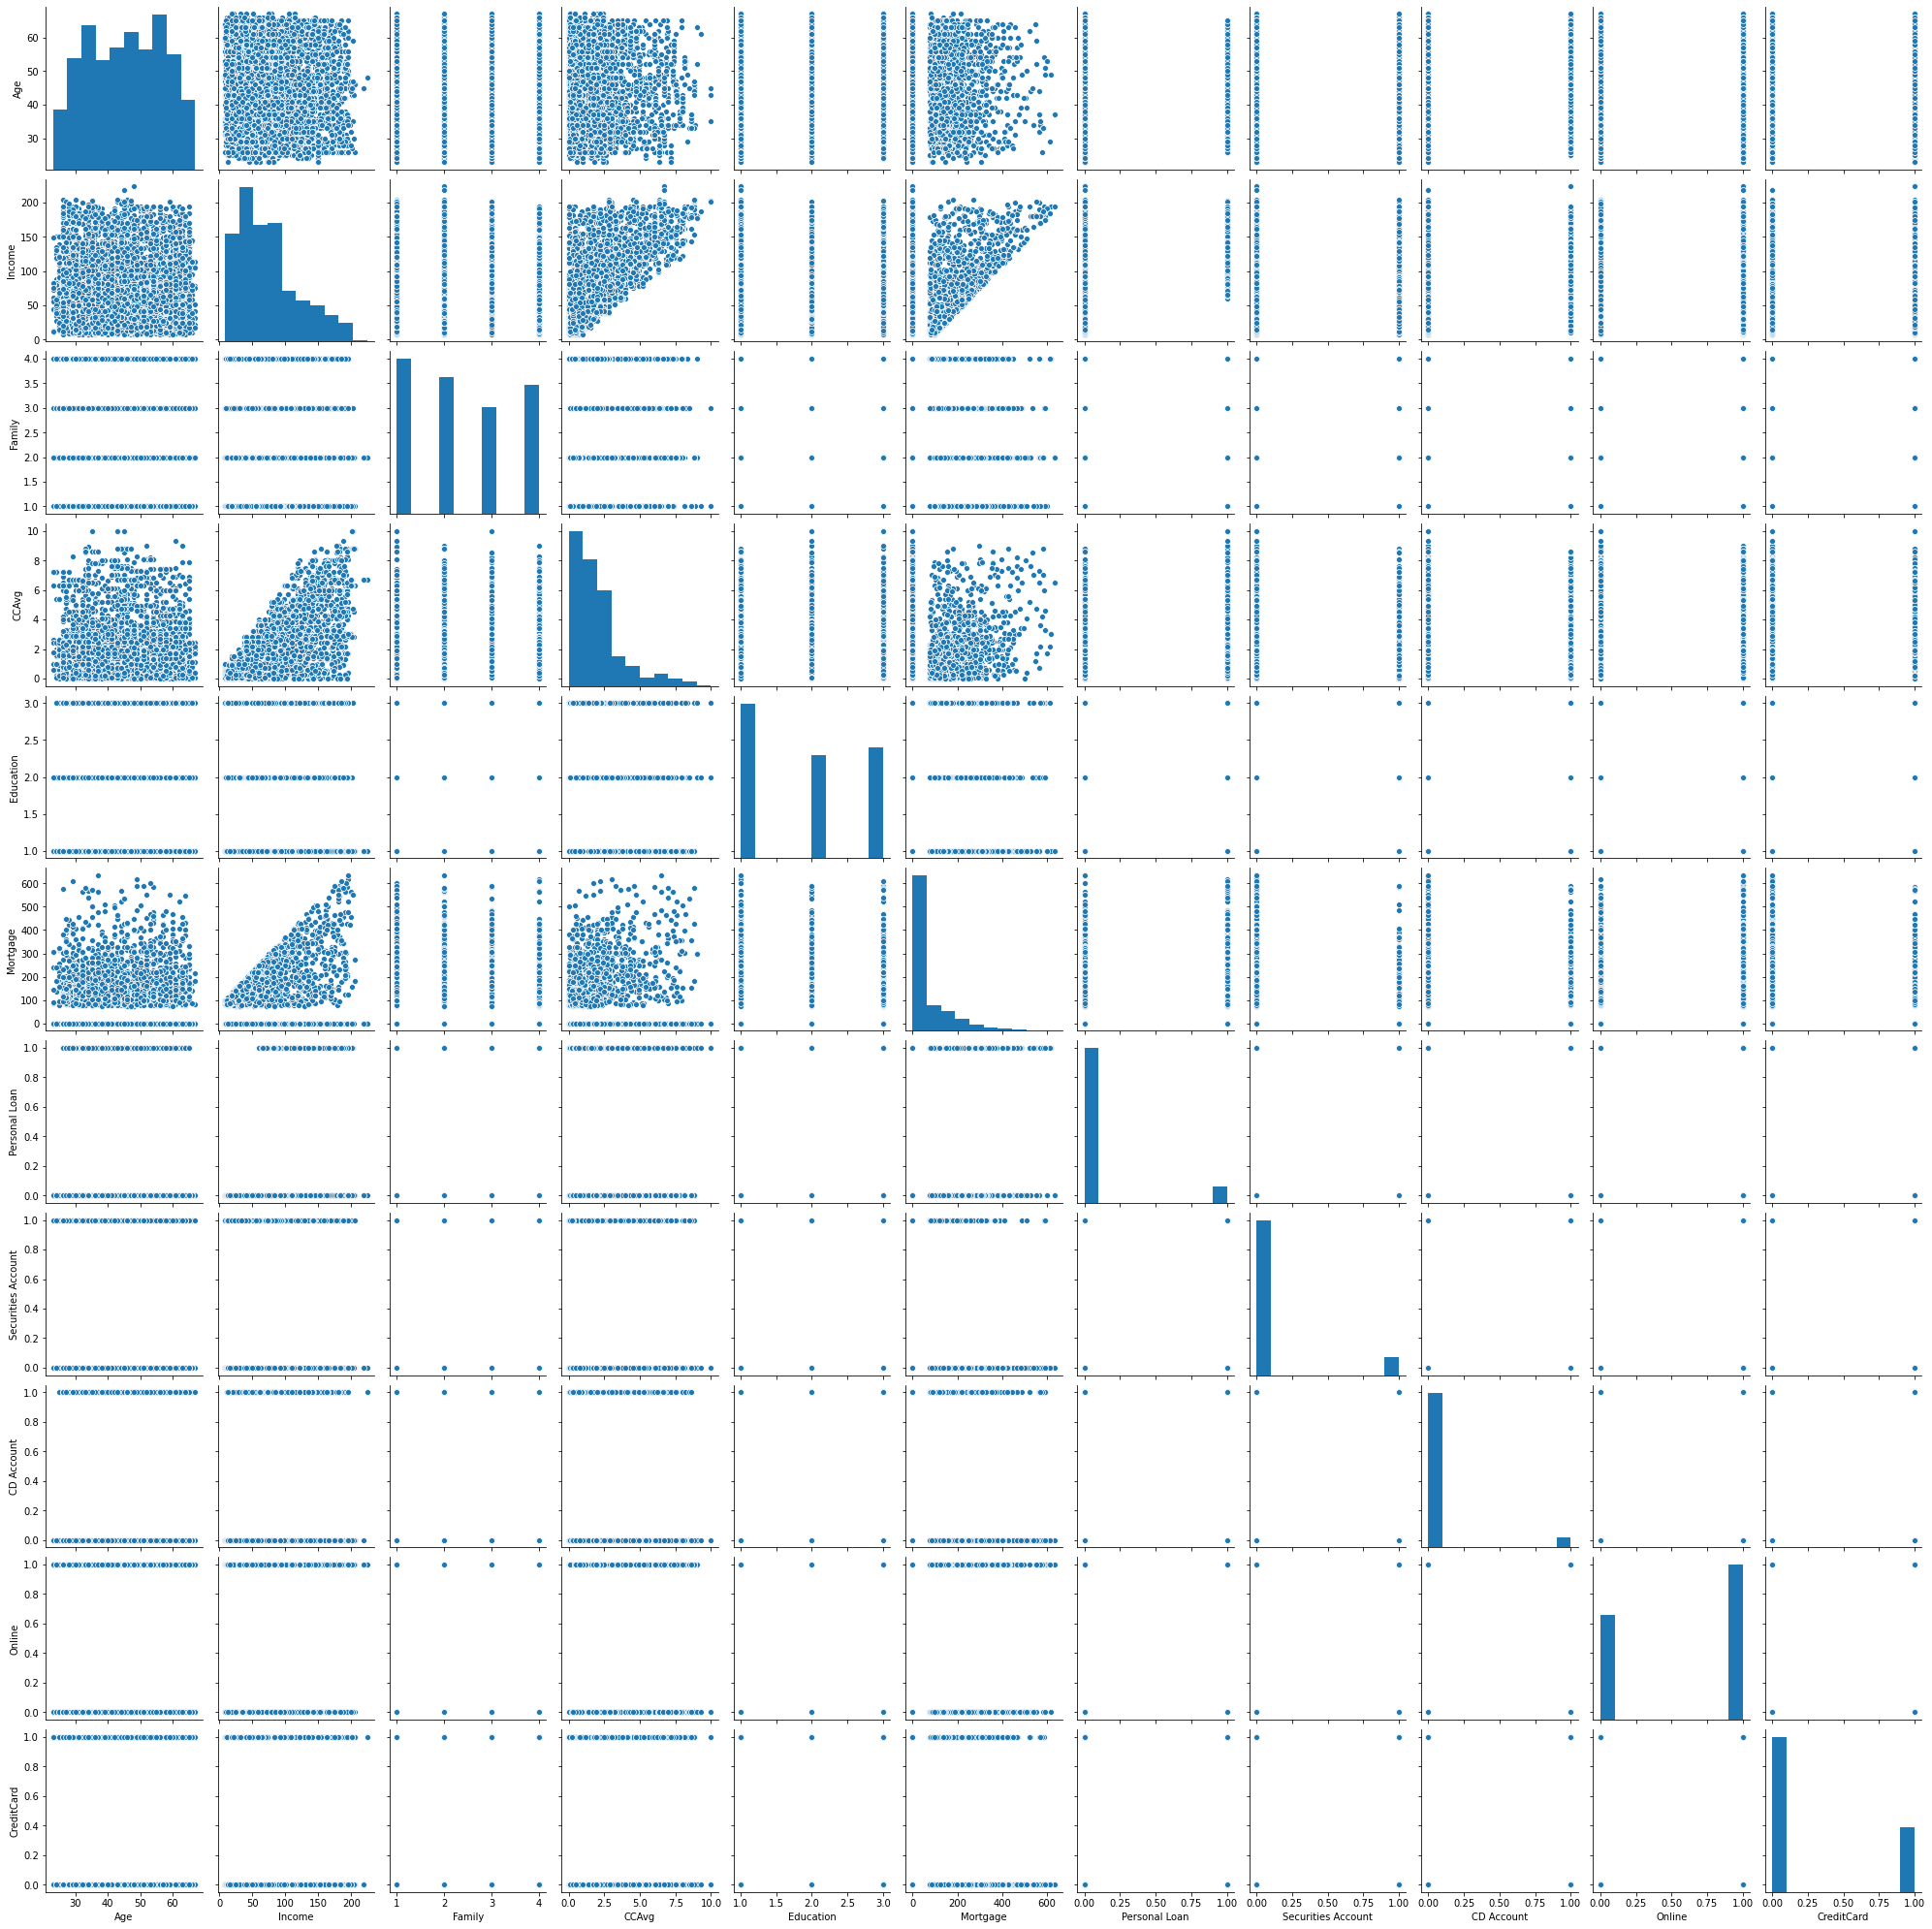

In [32]:
sns.pairplot(data)

### **Feature Transformation:**

Distribution of Income and ccavg feature were highly skewed. A closer look
reveals that it has log-normal distribution which means if we apply log transformation to Income, resulting distribution will be similar to a Gaussian. In scikit-learn, PowerTransformer can be used with methods Box-Cox and Yeo-Johnson.

A lot of customers doesn't have mortgage and the right side of the distribution is almost flat. We can construct an ordinal categorical feature Mortgage_Int using Mortgage feature. Then we drop Mortgage feature. We apply the same procedure to also test_x.

In [33]:
from sklearn.preprocessing import PowerTransformer

In [34]:
data_x = data.loc[:,data.columns != "Personal Loan"]
data_y = data[["Personal Loan"]]

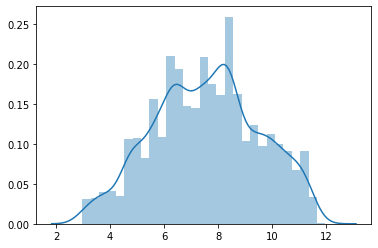

In [35]:
pt = PowerTransformer(method = 'yeo-johnson', standardize= False)
pt.fit(data_x['Income'].values.reshape(-1,1))
temp = pt.transform(data_x['Income'].values.reshape(-1,1))
sns.distplot(temp)

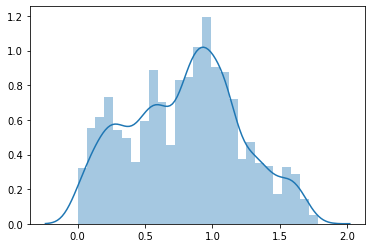

In [36]:
pt = PowerTransformer(method = 'yeo-johnson', standardize= False)
pt.fit(data_x['CCAvg'].values.reshape(-1,1))
temp = pt.transform(data_x['CCAvg'].values.reshape(-1,1))
sns.distplot(temp)

In [37]:
data_x["Mortgage_Int"] = pd.cut(data_x["Mortgage"], bins = [0,100,200,300,400,500,600,700], labels = [0,1,2,3,4,5,6], include_lowest = True)
data_x.drop("Mortgage", axis = 1, inplace = True)

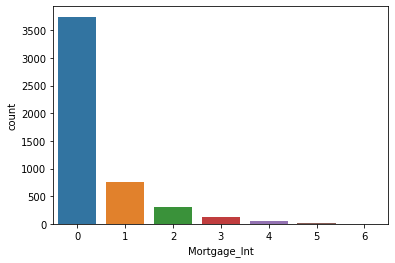

In [38]:
sns.countplot(data_x.Mortgage_Int)

# Data Splitting:



There are 2 classes and class ratio is approximately 1:9 which means our dataset is imbalanced.

Dataset is divided into 2 as train and test. We use stratify parameter of train_test_split function to get the same class distribution across train and test sets.

In [39]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size = 0.3, stratify = data_y, random_state = 42)

In [40]:
train_x.reset_index(drop=True, inplace=True);
test_x.reset_index(drop=True, inplace=True);
train_y.reset_index(drop=True, inplace=True);
test_y.reset_index(drop=True, inplace=True);

###**Standardization**

Input features are standardized to increase the learning performance. The aim is to transform each feature to have mean of 0 and standard deviation of 1. StandardScaler of scikit-learn is used. A StandardScaler is fit to the feature in train_x, then this scaler transforms the same feature in train_x and test_x. This process is repeated for all features.

In [41]:
from sklearn.preprocessing import StandardScaler

for ind, column in enumerate(train_x.columns):
    scaler = StandardScaler()
    
    # fit to train data
    scaler.fit(train_x[[column]])
    
    # transform train data
    np_array = scaler.transform(train_x[[column]])
    train_x.loc[:, column] = pd.Series(np_array.flatten())
    
    # transform test data
    np_array = scaler.transform(test_x[[column]])
    test_x.loc[:, column] = pd.Series(np_array.flatten())

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

# Applying Different Models

In [42]:
model_list=[]
model_f1_score=[]
model_accuracy_score=[]

### **Logistic Regression**

In [43]:
model_list.append('LogisticRegression')
lm=LogisticRegression()
lm.fit(train_x,train_y)
lm_accuracy_t = lm.score(train_x,train_y)
yhat_lm=lm.predict(test_x)
lm_score=f1_score(test_y,yhat_lm)
model_f1_score.append(lm_score)
lm_accuracy=accuracy_score(test_y,yhat_lm)
model_accuracy_score.append(lm_accuracy)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [44]:
print("Logistic Regression Train Accuracy:", lm_accuracy_t)
print("Logistic Regression Test Accuracy:", lm_accuracy)
print('\n', classification_report(test_y,yhat_lm))

Logistic Regression Train Accuracy: 0.9514285714285714
Logistic Regression Test Accuracy: 0.9533333333333334

               precision    recall  f1-score   support

           0       0.96      0.99      0.97      1356
           1       0.83      0.65      0.73       144

    accuracy                           0.95      1500
   macro avg       0.90      0.82      0.85      1500
weighted avg       0.95      0.95      0.95      1500



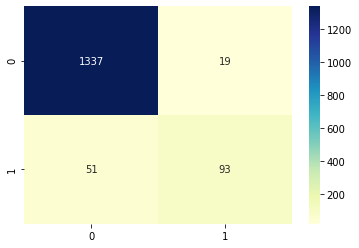

In [45]:
sns.heatmap(confusion_matrix(test_y,yhat_lm),annot=True,fmt='',cmap='YlGnBu')

### **DecisionTreeClassifier**

In [46]:
model_list.append('DecisionTreeClassifier')
tree=DecisionTreeClassifier()
tree.fit(train_x,train_y)
tree_accuracy_t = tree.score(train_x,train_y)
yhat_tree=tree.predict(test_x)
tree_score=f1_score(test_y,yhat_tree)
model_f1_score.append(tree_score)
tree_accuracy=accuracy_score(test_y,yhat_tree)
model_accuracy_score.append(tree_accuracy)

In [47]:
print("Decision Tree Train Accuracy:", tree_accuracy_t)
print("Decision Tree Test Accuracy:", tree_accuracy)
print('\n', classification_report(test_y,yhat_tree))

Decision Tree Train Accuracy: 1.0
Decision Tree Test Accuracy: 0.98

               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.88      0.92      0.90       144

    accuracy                           0.98      1500
   macro avg       0.93      0.95      0.94      1500
weighted avg       0.98      0.98      0.98      1500



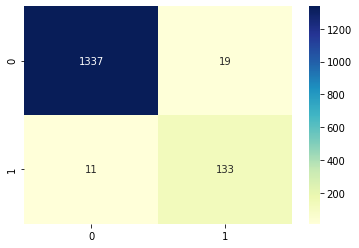

In [48]:
sns.heatmap(confusion_matrix(test_y,yhat_tree),annot=True,fmt='',cmap='YlGnBu')

### **RandomForestClassifier**

In [49]:
model_list.append('RandomForestClassifier')
forest=RandomForestClassifier()
forest.fit(train_x,train_y)
forest_accuracy_t = forest.score(train_x,train_y)
yhat_forest=forest.predict(test_x)
forest_score=f1_score(test_y,yhat_forest)
model_f1_score.append(forest_score)
forest_accuracy=accuracy_score(test_y,yhat_forest)
model_accuracy_score.append(forest_accuracy)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [50]:
print("Random forest Train accuracy:",forest_accuracy_t)
print("Random forest Test accuracy:",forest_accuracy)
print('\n', classification_report(test_y,yhat_forest))

Random forest Train accuracy: 1.0
Random forest Test accuracy: 0.988

               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1356
           1       0.96      0.91      0.94       144

    accuracy                           0.99      1500
   macro avg       0.98      0.95      0.96      1500
weighted avg       0.99      0.99      0.99      1500



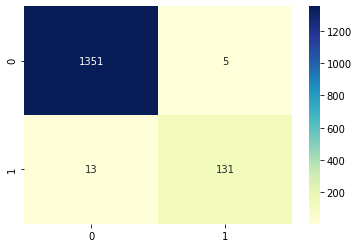

In [51]:
sns.heatmap(confusion_matrix(test_y,yhat_forest),annot=True,fmt='',cmap='YlGnBu')

### **Support Vector Classifier(SVC)**

In [52]:
model_list.append('SVC')
svc=SVC()
svc.fit(train_x,train_y)
svc_accuracy_t = svc.score(train_x,train_y)
yhat_svc=svc.predict(test_x)
svc_score=f1_score(test_y,yhat_svc)
model_f1_score.append(svc_score)
svc_accuracy=accuracy_score(test_y,yhat_svc)
model_accuracy_score.append(svc_accuracy)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [53]:
print("SVC Train accuracy:",svc_accuracy_t)
print("SVC Test accuracy:",svc_accuracy)
print('\n',classification_report(test_y,yhat_svc))

SVC Train accuracy: 0.982
SVC Test accuracy: 0.9746666666666667

               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1356
           1       0.96      0.77      0.85       144

    accuracy                           0.97      1500
   macro avg       0.97      0.88      0.92      1500
weighted avg       0.97      0.97      0.97      1500



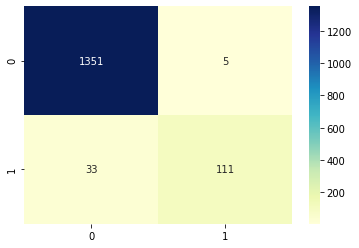

In [54]:
sns.heatmap(confusion_matrix(test_y,yhat_svc),annot=True,fmt='',cmap='YlGnBu')

### **KNeighborsClassifier**

In [55]:
model_list.append('KNeighborsClassifier')
neighbour=KNeighborsClassifier()
neighbour.fit(train_x,train_y)
neighbour_accuracy_t = neighbour.score(train_x,train_y)
yhat_neighbour=neighbour.predict(test_x)
neighbour_score=f1_score(test_y,yhat_neighbour)
model_f1_score.append(neighbour_score)
neighbour_accuracy=accuracy_score(test_y,yhat_neighbour)
model_accuracy_score.append(neighbour_accuracy)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [56]:
print("KNN train accuracy:",neighbour_accuracy_t)
print("KNN test accuracy:",neighbour_accuracy)
print('\n',classification_report(test_y,yhat_neighbour))

KNN train accuracy: 0.97
KNN test accuracy: 0.9593333333333334

               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1356
           1       0.97      0.60      0.74       144

    accuracy                           0.96      1500
   macro avg       0.96      0.80      0.86      1500
weighted avg       0.96      0.96      0.95      1500



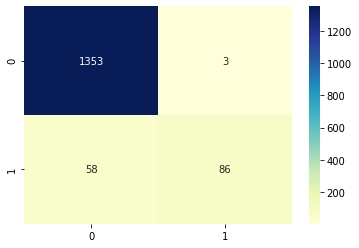

In [57]:
sns.heatmap(confusion_matrix(test_y,yhat_neighbour),annot=True,fmt='',cmap='YlGnBu')

### **Naive Bayes**

In [58]:
model_list.append('Naive Bayes')
naive_model = GaussianNB()
naive_model.fit(train_x, train_y)
naive_accuracy_t = naive_model.score(train_x,train_y)
yhat_naive=naive_model.predict(test_x)
naive_score=f1_score(test_y,yhat_naive)
model_f1_score.append(naive_score)
naive_accuracy=accuracy_score(test_y,yhat_naive)
model_accuracy_score.append(naive_accuracy)

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [59]:
print("NB train accuracy:",naive_accuracy_t)
print("NB test accuracy:",naive_accuracy)
print('\n',classification_report(test_y,yhat_naive))

NB train accuracy: 0.8817142857142857
NB test accuracy: 0.8793333333333333

               precision    recall  f1-score   support

           0       0.95      0.91      0.93      1356
           1       0.41      0.58      0.48       144

    accuracy                           0.88      1500
   macro avg       0.68      0.74      0.71      1500
weighted avg       0.90      0.88      0.89      1500



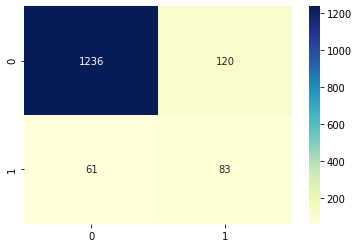

In [60]:
sns.heatmap(confusion_matrix(test_y,yhat_naive),annot=True,fmt='',cmap='YlGnBu')

#Results

### F1-Score

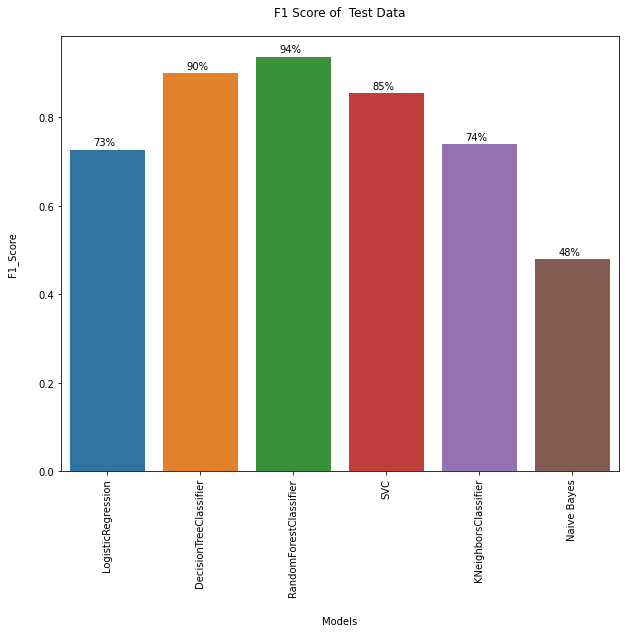

In [61]:
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(model_list,model_f1_score)
ax.set_title("F1 Score of  Test Data",pad=20)
ax.set_xlabel("Models",labelpad=20)
ax.set_ylabel("F1_Score",labelpad=20)
plt.xticks(rotation=90)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (x+0.25, y + height + 0.01))

### Accuracy

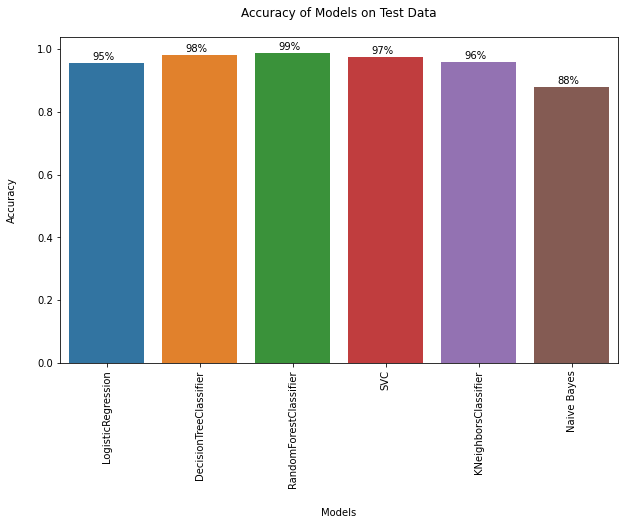

In [62]:
fig,ax=plt.subplots(figsize=(10,6))
sns.barplot(model_list,model_accuracy_score)
ax.set_title("Accuracy of Models on Test Data",pad=20)
ax.set_xlabel("Models",labelpad=20)
ax.set_ylabel("Accuracy",labelpad=20)
plt.xticks(rotation=90)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (x+0.25, y + height + 0.01))

# Conclusion


The aim of the bank is to convert there liability customers into loan customers. They want to set up a new marketing campaign; hence, they need information about the connection between the variables given in the data. Six classification algorithms were used in this study. From the above graph ,among these **Random Forest** algorithm have the highest accuracy.
RandomForestClassifier gives the best F1 Score and accuracy score with **accuracy over 99%** and **F1-Score of 94%**

# Business Understanding


We can **conclude** these points from the above analysis:

* The classification **goal** is to predict the likelihood of a liability customer buying personal loans.
* Personal Loan doesn't show significant variations with **Age**.
* We found out that **Experience** feature had the same correlation with output as the age have, so was not reqired in experimentation.
* **Zip code** data was too diverse (467 unique values) to be accomodated. So also not required.
* **Income** has a good effect on Personal Loan. Customers with High Income have more chances of having Personal Loan.
* **CCAvg** also show a good relationship with Personal Loan. Customers with personal loan have high Avg. spending on credit cards per month.
* Customers with low **Mortgage** have opted for Personal Loan.
* Majority of customers who does not have loan have **securities account**
* Customers with **family** size equal to 3 have more chances of having Personal Loan.
* Customers with Undergrad degree(**Education**) have less chances of having Personal Loan as compaired to other customers having Graduate or Advanced/Professional degree
* Customers with **CD Account and Securities Account** have more chances of having Personal Loan.
* Customers using **online** Facitilies or not, having **credit card** or not doesn't effect much in chances of having Personal Loan 
* Considering the Constraints, Supervised Learning methods like Logistic Regression, Naive Bayes Algorithm, Decision Tree Classifier, Random Forest Classifier, KNN Algorithm, SVM were applied out of which **Random Forest dominated.**